In [29]:
!! pip install quandl

['Requirement already satisfied: quandl in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (3.3.0)',
 'Requirement already satisfied: pandas>=0.14 in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (0.20.3)',
 'Requirement already satisfied: numpy>=1.8 in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (1.13.3)',
 'Requirement already satisfied: requests>=2.7.0 in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (2.18.4)',
 'Requirement already satisfied: inflection>=0.3.1 in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (0.3.1)',
 'Requirement already satisfied: python-dateutil in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (2.6.1)',
 'Requirement already satisfied: six in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) (1.11.0)',
 'Requirement already satisfied: more-itertools in /Users/mrefermat/anaconda3/lib/python3.6/site-packages (from quandl) 

In [30]:
%matplotlib inline
import quandl
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as mpl
import random
import numpy as np
from datetime import datetime
import scipy.cluster.hierarchy as sch
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

In [31]:
import pylab
sns.set(font_scale=2)
pylab.rcParams['figure.figsize'] = (16, 12)

# Load data
First objective is to load lots of different markets.  I am going to resample to use just monthly data.

In [98]:
df=pd.DataFrame()
df['SP500']=quandl.get("CHRIS/CME_SP1", authtoken=token).Settle
df['Gold']=quandl.get("CHRIS/CME_GC1", authtoken=token).Settle
df['USD Index']=quandl.get("CHRIS/ICE_DX1", authtoken=token).Settle
df['US 10Y']=quandl.get("CHRIS/CME_US1", authtoken=token).Settle
df['Wheat']=quandl.get("CHRIS/CME_W1", authtoken=token).Settle
df['Crude WTI']=quandl.get("CHRIS/CME_CL1", authtoken=token).Settle
df['US Treasury']=quandl.get("CHRIS/CME_TY1", authtoken=token).Settle


########### Extra Markets ###############################
df['Eurostoxx 50']=quandl.get("CHRIS/EUREX_FESX1", authtoken=token).Settle
df['Russel']=quandl.get("CHRIS/ICE_TF1", authtoken=token).Settle
#df['Russel']=quandl.get("CHRIS/ICE_TF1", authtoken=token).Settle
#df['Euro']=quandl.get("CHRIS/CME_EC1", authtoken=token).Settle
#df['GBP']=quandl.get("CHRIS/CME_BP1", authtoken=token).Settle
#df['Corn']=quandl.get("CHRIS/CME_C1", authtoken=token).Settle
#df['Eurodollar']=quandl.get("CHRIS/CME_ED1", authtoken=token).Settle
df['Copper']=quandl.get("CHRIS/CME_HG1", authtoken=token).Settle

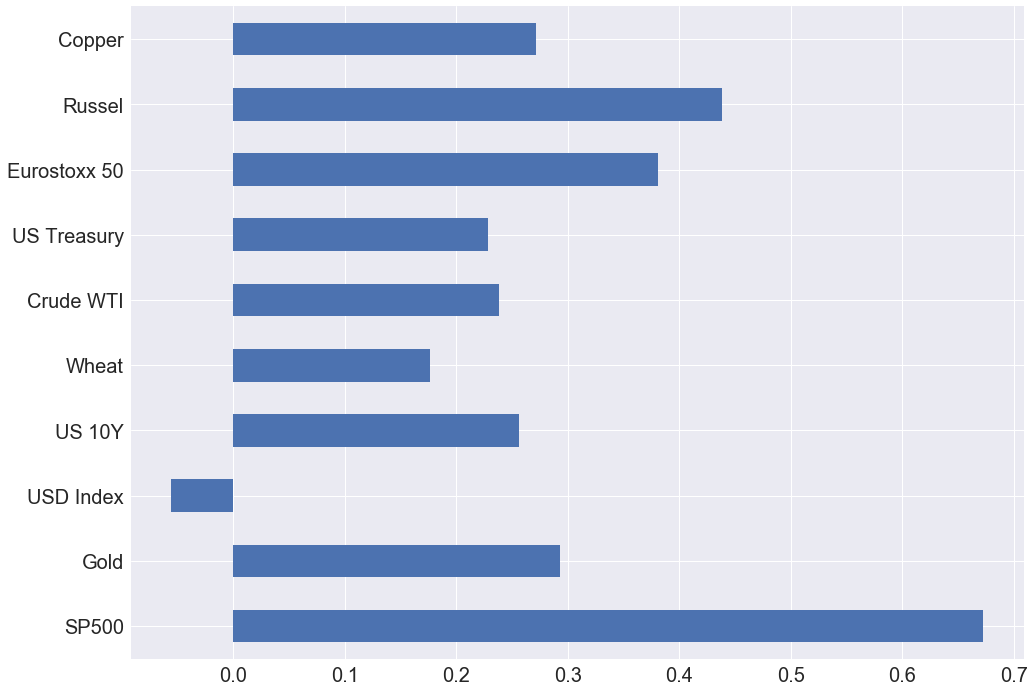

In [100]:
calc_Sharpe(pct_rtns).plot(kind='barh')

In [32]:
calc_Sharpe

,SP500,Gold,USD Index,US 10Y,Wheat,Crude WTI,US Treasury
Date,,,,,,,
2018-09-12,2888.4,1205.5,94.768,143.06250,481.75,70.37,119.609375
2018-09-13,2905.3,1202.8,94.517,143.15625,471.75,68.59,119.593750
2018-09-14,2906.3,1196.2,94.925,142.53125,480.00,68.99,119.359375
2018-09-17,2891.0,1201.2,94.486,142.40625,506.25,68.91,119.312500
2018-09-18,2906.5,1198.5,NaN,141.40625,510.50,69.85,118.984375


In [99]:
price=df.resample(rule='m',how='last')
pct_rtns = price.pct_change()

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  """Entry point for launching an IPython kernel.


In [33]:
pct_rtns.tail()

,SP500,Gold,USD Index,US 10Y,Wheat,Crude WTI,US Treasury
Date,,,,,,,
2018-05-31,0.022100,-0.012232,0.025417,0.014990,0.026829,-0.022313,0.009274
2018-06-30,0.005951,-0.035074,0.004151,-0.006849,-0.054632,0.106056,-0.004530
2018-07-31,0.035090,-0.024552,-0.000784,-0.014009,0.113065,-0.072690,-0.006370
2018-08-31,0.030173,-0.018060,0.008571,0.013989,-0.063657,0.015125,0.008112
2018-09-30,0.001516,-0.002580,-0.006279,-0.024574,-0.015429,0.000716,-0.011681


/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


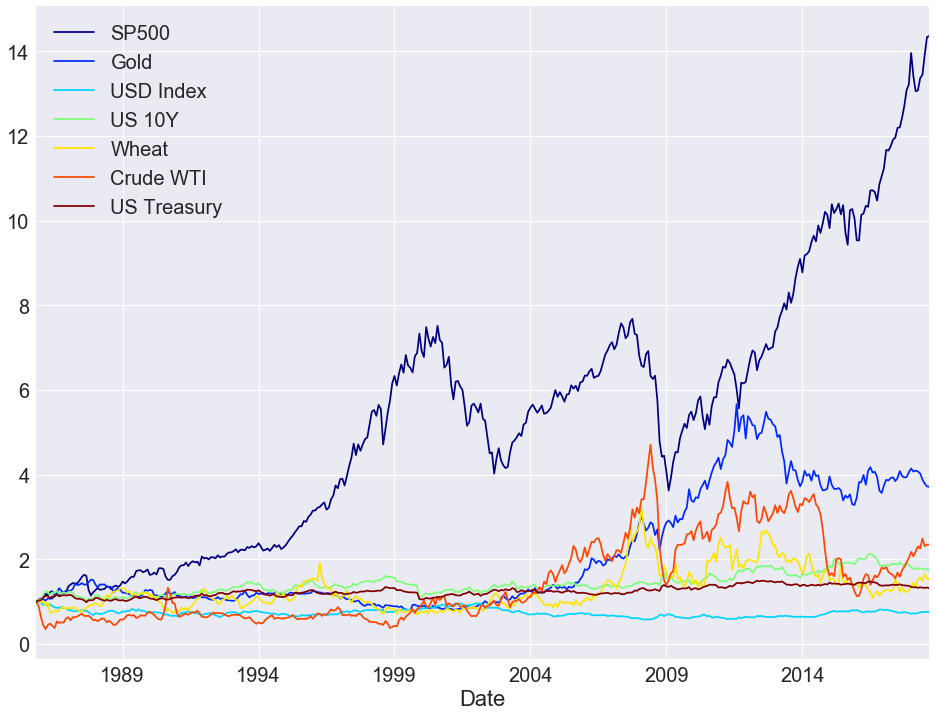

In [38]:
(price.dropna()/price.dropna().ix[0]).plot(colormap='jet')

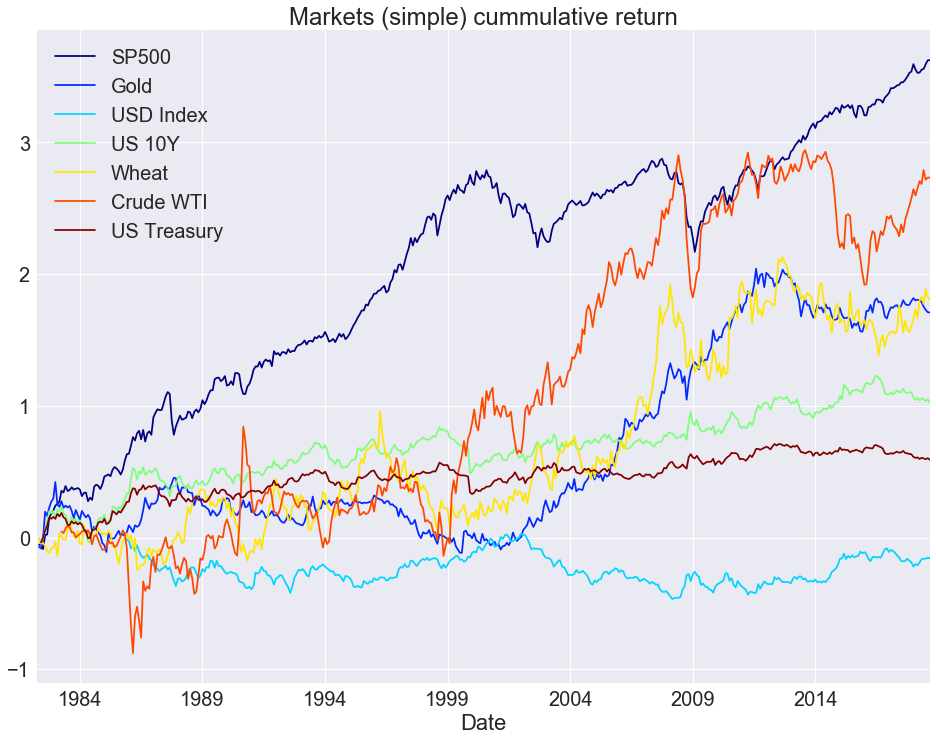

In [21]:
pct_rtns.cumsum().plot(colormap='jet',title='Markets (simple) cummulative return')

# Now lets create some portfolios

Things to think about for each one

* Any look ahead bias?
* How does it work in practice?  E.g. how do you trade this?
* How much trading is required?
* How much overfitting risk is there? Or how robust is it?
* What is the Sharpe Ratio of each?



To calculate Sharpe you can use the simple formula below which takes a DataFrame or Series and outputs the Sharpe ratio.  You may notice there is no risk free rate in the calcuation and some might call this an "information ratio," but with futures this can be justified more on this in the talk

In [39]:
def calc_Sharpe(pnl,N=12):
    return np.sqrt(N) * pnl.mean() / pnl.std()

In [17]:
final_portfolios=pd.DataFrame()

# 1/N  (Equal weighting)

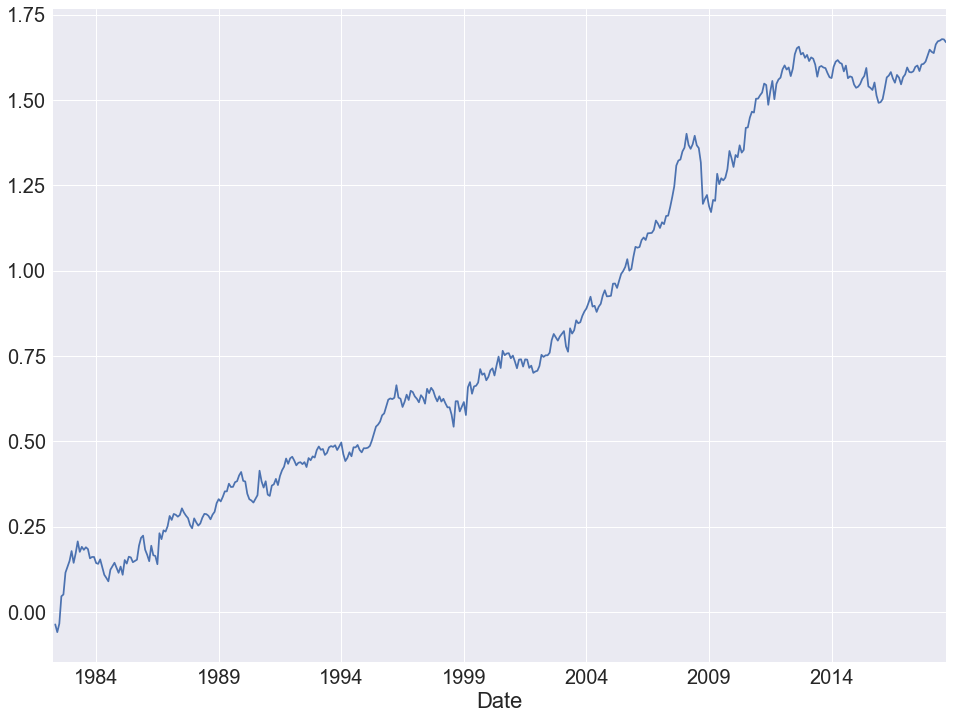

In [43]:
pct_rtns.mean(axis=1).cumsum().plot()

In [44]:
final_portfolios['1/N']=pct_rtns.mean(axis=1)

In [45]:
final_portfolios.tail()

,1/N
Date,
2018-05-31,0.009152
2018-06-30,0.002153
2018-07-31,0.004250
2018-08-31,-0.000821
2018-09-30,-0.008330


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2390e438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a24b98208>], dtype=object)

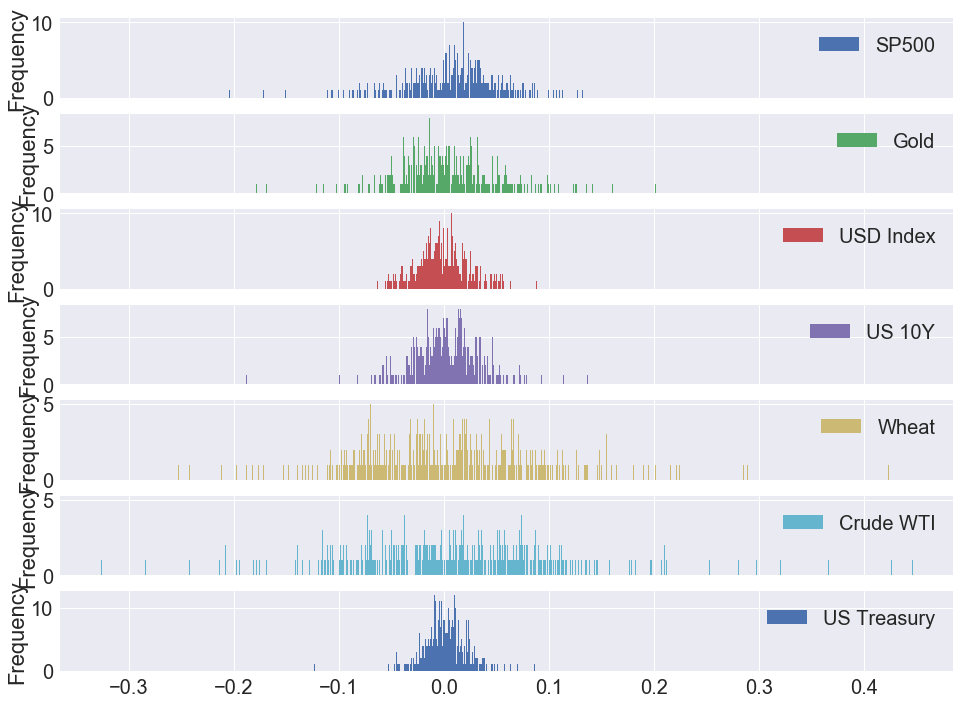

In [50]:
pct_rtns.plot(kind='hist',subplots=True,bins=1000)

# Volatility scaled 1 / N

This approach requires scaling the returns by volatility.  The idea is we want equal "risk" contribution for each market

See the table below on the risk contribution to the overall portfolio (undiversified risk - non additive)

In [46]:
pd.DataFrame.ewm(pct_rtns,60,min_periods=60).std()

,SP500,Gold,USD Index,US 10Y,Wheat,Crude WTI,US Treasury
Date,,,,,,,
1982-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


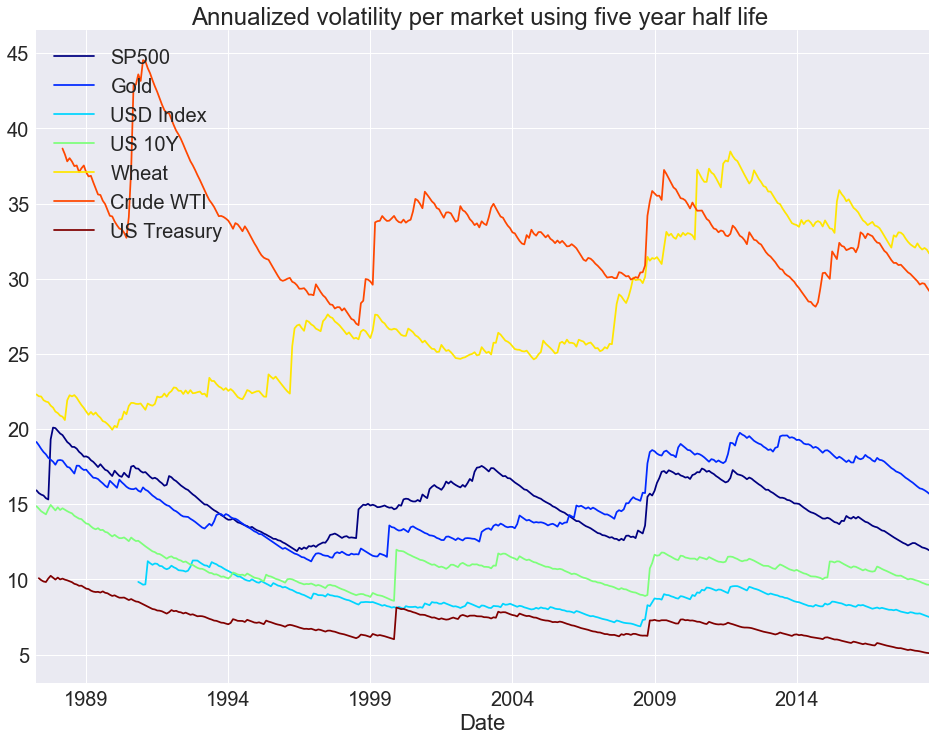

In [47]:
(pd.DataFrame.ewm(pct_rtns,60,min_periods=60).std()*346).dropna(how='all').plot(colormap='jet',
                                                                    title='Annualized volatility per market using five year half life ')

In [55]:
# Full Sample vol scaling
import math
(pct_rtns.std()*math.sqrt(12)*100).round(2)

SP500          14.81
Gold           16.07
USD Index       8.68
US 10Y         10.95
Wheat          28.49
Crude WTI      32.59
US Treasury     7.11
dtype: float64

In [58]:
final_portfolios['Vol Scaled 1/N In sample']=(pct_rtns/pct_rtns.std()).mean(axis=1)

In [ ]:
# out of sample

In [65]:
final_portfolios['1/N Vol Out Sample']=(pct_rtns/pd.DataFrame.ewm(pct_rtns,60,min_periods=60).std()).mean(axis=1)

# Capitalization weighted practice (but clearly WRONG!)

Since the idea of market capitalization for fututres doesn't really exist.  I just want to show for comparison how to create a capital weighted index using these futures.

Big assumption (and clearly very wrong), but let's assume price is the total capitalization of each future and each month we want to reblance.  

In [72]:
price.tail()

,SP500,Gold,USD Index,US 10Y,Wheat,Crude WTI,US Treasury
Date,,,,,,,
2018-05-31,2705.5,1300.1,93.959,146.00000,526.25,67.04,120.734375
2018-06-30,2721.6,1254.5,94.349,145.00000,497.50,74.15,120.187500
2018-07-31,2817.1,1223.7,94.275,142.96875,553.75,68.76,119.421875
2018-08-31,2902.1,1201.6,95.083,144.96875,518.50,69.80,120.390625
2018-09-30,2906.5,1198.5,94.486,141.40625,510.50,69.85,118.984375


In [76]:
w=(price.T/price.sum(axis=1)).T

In [79]:
final_portfolios['Market Cap']=(w*pct_rtns).sum(axis=1)

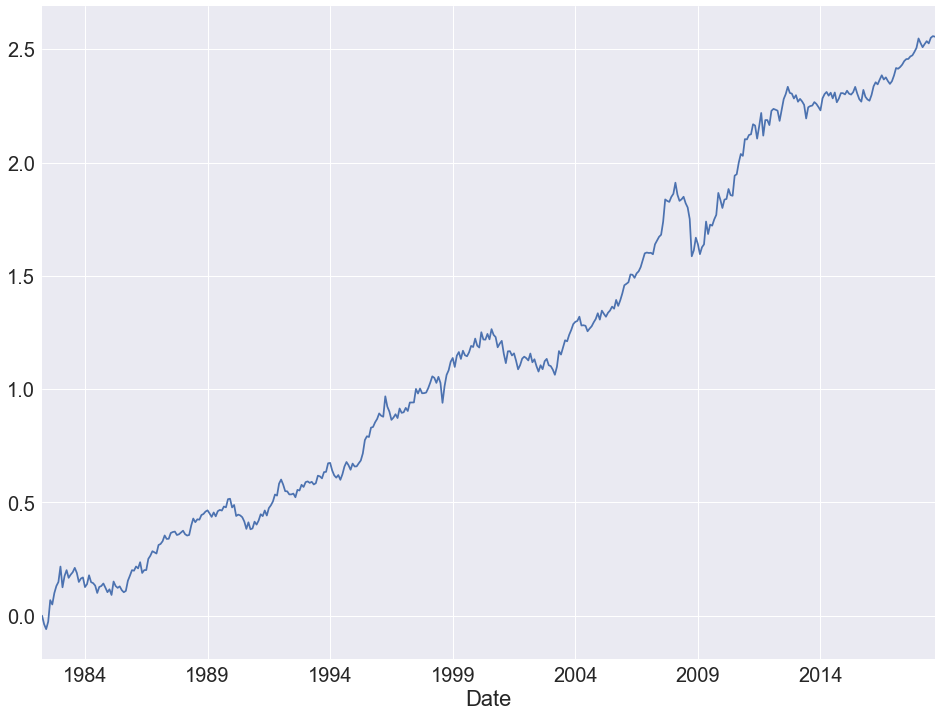

In [78]:
(w*pct_rtns).sum(axis=1).cumsum().plot()

# Markowtiz Optimization (full in sample)

Very simplistic version with no concept of risk adversion (investor indifference).  Also there are no constraints thus it allows for long short and unlimited leverage.  


 $$ \max_{x_t} \left [ \omega' \mu - \frac{\gamma}{2}\omega' \Sigma \omega \right ] $$
 
 Solving for the first order condition (FOC), we get:
 
 $$ \omega = \frac{1}{\gamma} \Sigma^{-1} \mu $$

In [80]:
# Helper function to calculate weights
# give the function pandas DataFrame and output is a vector of portfolio weights (pandas Series)
def mean_variance(data):
    sigma=data.cov().values
    mu=data.mean().values
    inverse = np.linalg.inv(sigma)
    return pd.Series(inverse.dot(mu),index=data.mean().index)

In [82]:
w=mean_variance(pct_rtns)

In [84]:
final_portfolios['Markowitz']=(w*pct_rtns).sum(axis=1)

# Final comparison

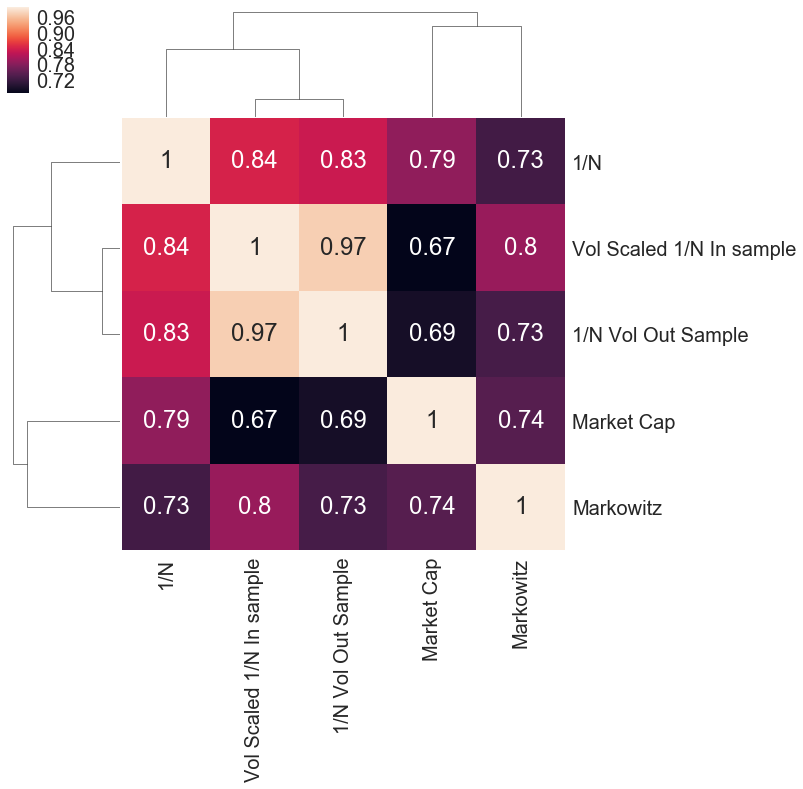

In [88]:
sns.clustermap(final_portfolios.corr(),annot=True)

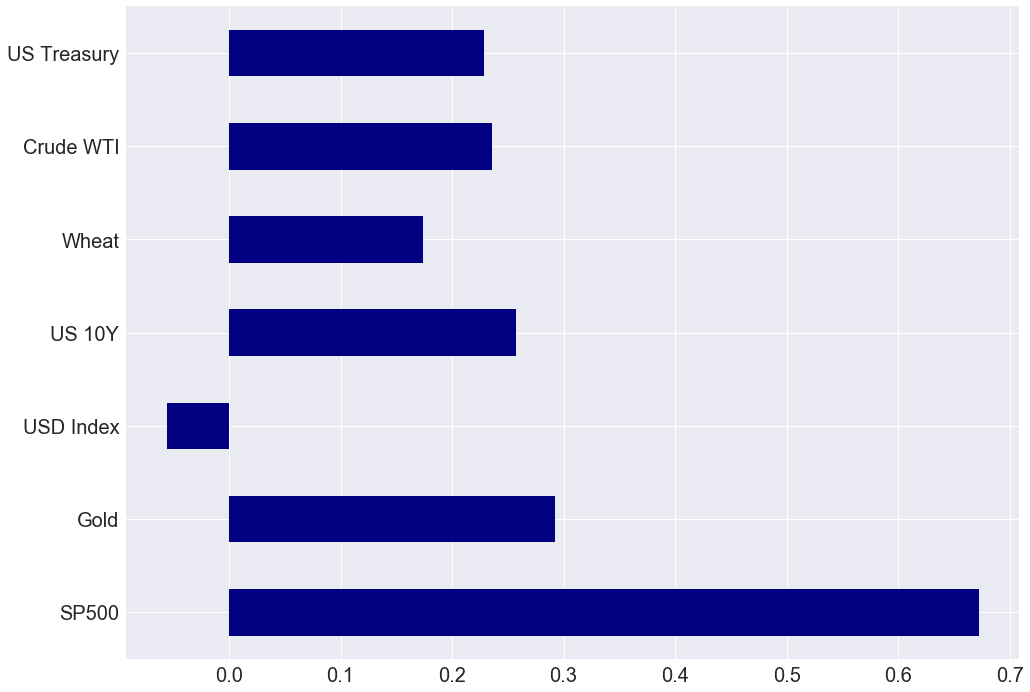

In [97]:
calc_Sharpe(pct_rtns).plot(kind='barh',colormap='jet')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b779c88>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a2bb5c898>], dtype=object)

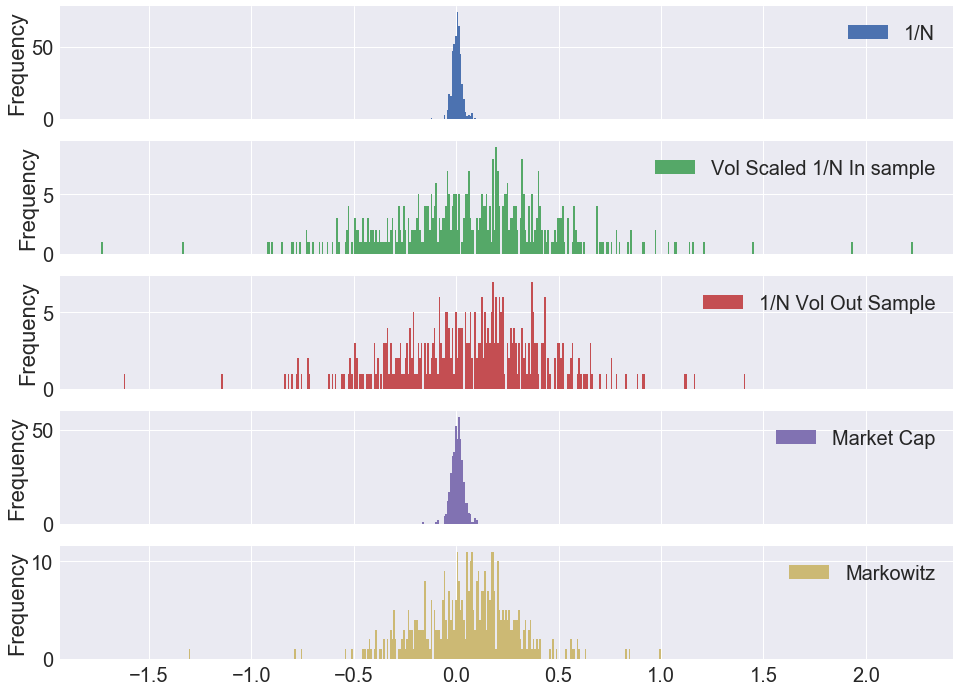

In [93]:
final_portfolios.plot(kind='hist',bins=500,subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bd61e80>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a2d77ad68>], dtype=object)

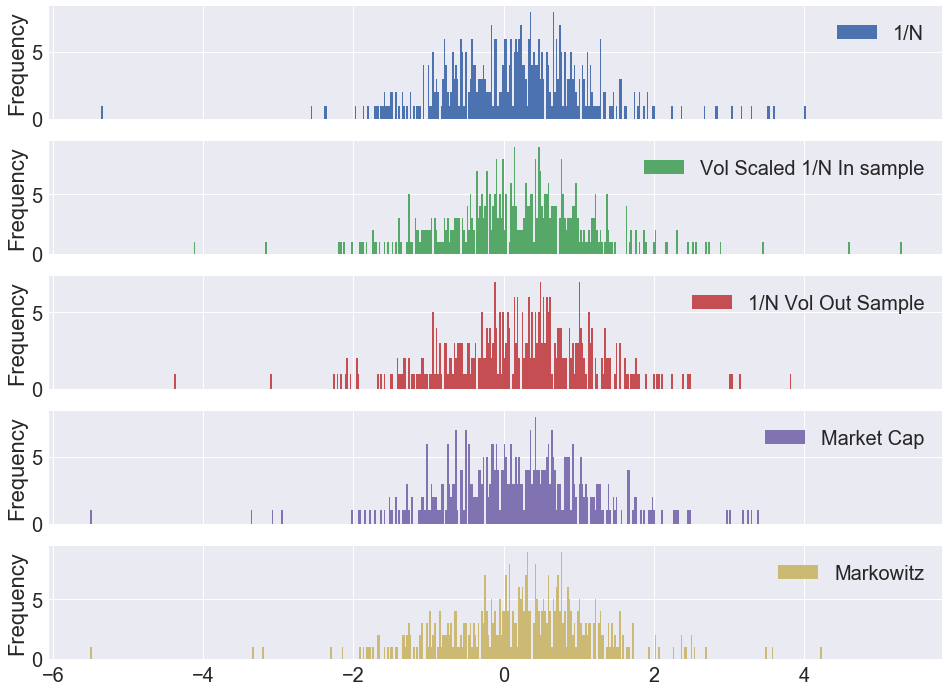

In [95]:
(final_portfolios/final_portfolios.std()).plot(kind='hist',bins=500,subplots=True)

In [96]:
final_portfolios.skew()

1/N                         0.072888
Vol Scaled 1/N In sample    0.308067
1/N Vol Out Sample         -0.227831
Market Cap                 -0.291011
Markowitz                  -0.409885
dtype: float64

In [ ]:
calc_Sharpe